###**NOTE**
using Arabert preprocessor reduce accurracy




# install transformer from huggingface

In [1]:
pip install transformers #install transformer from hugging face


In [2]:
pip install arabert # install arabert

In [3]:
# !pip install farasapy

# import libraries and models

In [4]:
import os
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

from transformers import AutoTokenizer, TFBertForSequenceClassification
import tensorflow as tf
tf.random.set_seed(50) # To fix the intiallization


# Load the pre-trained model and tokenizer


In [5]:
#load tokenizer and model from huggingface
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv02")
model_1 = TFBertForSequenceClassification.from_pretrained("aubmindlab/bert-base-arabertv02",num_labels =3) # dataset has three labels (positive ,nuetral and negative)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
# #import preprocessing library
# from arabert.preprocess import ArabertPreprocessor

# model_name = "aubmindlab/bert-base-arabertv2"
# arabert_prep = ArabertPreprocessor(model_name=model_name)

# load dataset and check it


In [7]:
read_train_data =pd.read_csv("train.csv" ,encoding="utf-8") #dataset  from kaggle
read_test_data =pd.read_csv("test.csv" ,encoding="utf-8") #dataset  from kaggle


In [8]:
train_data=read_train_data
test_data=read_test_data

In [9]:
train_data.isnull().sum()
train_data.dropna(inplace=True)
test_data.isnull().sum()
test_data.dropna(inplace=True)


In [10]:
train_data.head(10)

,Tweet,Class
0,وزير الخارجية اللبناني جبران باسيل قال في سلسل...,normal
1,سورية بلد الحضارات تربطها بعلية او بحيوان,normal
2,اخي الحاج اذا شعرت انك محرجا من الانتقادات لتص...,normal
3,ما فيك تعيش بلا ما تكب فتن ليل نهار وبكرة قلهم...,normal
4,هذا البطل الذي قاتل وجاذف بحياته لتحيا انت يا ...,abusive
5,ولعها وهيك بتكون الشقيقة قدمت اكبر خدمة لشقيقت...,normal
6,قبل ما تترحم وسام الحسن كان مشارك بقتل الحريري...,normal
7,كلنا معك معالي الوزير الملك جبران باسيل,normal
8,ولك مبارح أيها المريض النفسي كنت عم تدافع عن ا...,normal
9,انو غريب يوجعك راسك القواتجية عادة بيكونو بلا راس,hate


In [11]:
test_data.head(10)

,Tweet,Class
0,وحاج حكي مثاليات وامه ومابعرف شو ،اخر هم عندكم...,normal
1,قطر مرادف الارهاب,hate
2,ارمني يوناني يحمل جنسية المانية من مواليد سوري...,hate
3,يا حمار قمة يعني زبالة,abusive
4,ما حدا غير يلي خلفتك عاهرة يا منحط يا سافل,abusive
5,قال جبران باسيل انو أمير قطر كسر الحصار على قط...,normal
6,صدقت ياصوت لبنان الحر العابق بالنضال والوطنية ...,normal
7,متابعةً لزيارة الوزير جبران باسيل الى وارسو، ع...,normal
8,عودة المياه إلى مجاريرها بين سوريا و الإمارات,normal
9,هي بتنطبق عليك وزير الصدفه,normal


In [12]:
#splitting train dataset to train and validation sets
train_text=train_data['Tweet']
train_text
train_text.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4676 entries, 0 to 4675
Series name: Tweet
Non-Null Count  Dtype 
--------------  ----- 
4676 non-null   object
dtypes: object(1)
memory usage: 36.7+ KB


In [13]:
#splitting train dataset to train and validation sets
test_text=test_data['Tweet']
# train_text=train_data
test_text
test_text.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1170 entries, 0 to 1169
Series name: Tweet
Non-Null Count  Dtype 
--------------  ----- 
1170 non-null   object
dtypes: object(1)
memory usage: 9.3+ KB


In [14]:
train_data['Class'].replace({'normal':0,'abusive':1,'hate':2},inplace=True)

train_labels=train_data['Class']


In [15]:
train_labels.unique()

array([0, 1, 2])

In [16]:
test_data['Class'].replace({'normal':0,'abusive':1,'hate':2},inplace=True)

test_labels=test_data['Class']
# test_labels = test_labels.astype(float)


In [17]:
count_values_train=train_data['Class'].value_counts()
count_values_test=test_data['Class'].value_counts()
print(count_values_train)
print(count_values_test)



0    2920
1    1382
2     374
Name: Class, dtype: int64
0    730
1    346
2     94
Name: Class, dtype: int64


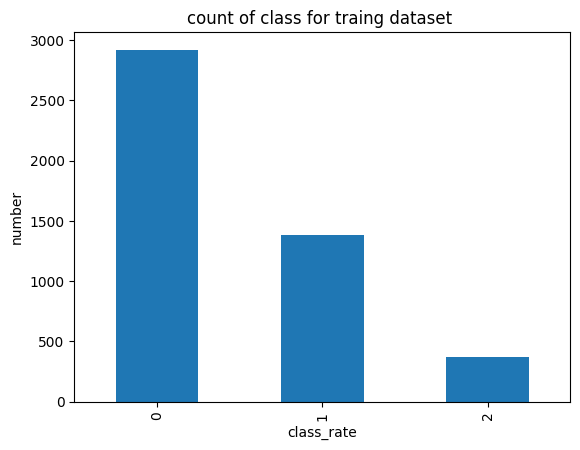

In [18]:
import matplotlib.pyplot as plt
plt.figure()  # Adjust the figure size
count_values_train.plot(kind='bar')
plt.xlabel('class_rate')
plt.ylabel('number')
plt.title('count of class for traing dataset ')
plt.show()

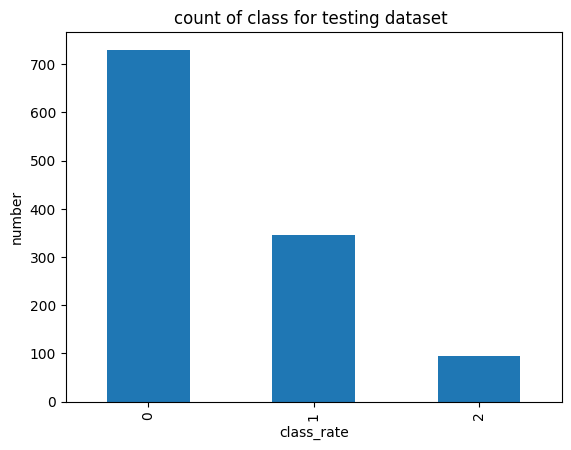

In [19]:
import matplotlib.pyplot as plt
plt.figure()  # Adjust the figure size
count_values_test.plot(kind='bar')
plt.xlabel('class_rate')
plt.ylabel('number')
plt.title('count of class for testing dataset ')
plt.show()

In [20]:
print(type(train_text))

<class 'pandas.core.series.Series'>


In [21]:
#convert labels to tensors
train_labels = tf.constant(train_labels)

In [22]:
#convert labels to tensors
test_labels = tf.constant(test_labels)

In [23]:
train_labels

<tf.Tensor: shape=(4676,), dtype=int64, numpy=array([0, 0, 0, ..., 0, 1, 0])>

In [24]:
# new_train_text = train_text.apply(lambda x: arabert_prep.preprocess(x))


In [25]:
# new_train_text

# cleaning data and preprocessing

In [26]:
# def preprocess(data) :
#   data = data.values.tolist() #convert data text to list
#   clean_data=[]#cleaning data
#   for tweet in data:
#         tweet=re.sub("(#|@)[a-zA-Z0-9_]*"," ",tweet) # remove hash& mention
#         tweet=re.sub("https?:\/\/\S+"," ",tweet)# remove hyperlink
#         # tweet=re.sub("\W"," ",tweet)
#         # tweet=re.sub("\s+$","",tweet)
#         tweet=re.sub("(\xe9|\362)"," ",tweet) # to remove Unicode characters
#         tweet =re.sub("\s+[a-zA-Z]\s+", " ", tweet) # to remove single letter
#         # tweet = re.sub("[^a-zA-Z+']"," ",tweet)  # to keep char
#         # append clean tweet
#         clean_data.append(tweet if tweet not in stop_words  else " ")

#   data_encodings = tokenizer(data, truncation=True,padding="max_length", max_length=64) # Tokenize the data  texts
#   data_input_ids = tf.constant(data_encodings['input_ids'])  # Convert input encodings to tensors
#   data_attention_mask = tf.constant(data_encodings['attention_mask'])
#   return clean_data, data_input_ids , data_attention_mask




In [27]:
def tokenization(data) :
  data = data.values.tolist() #convert data text to list
  data_encodings = tokenizer(data, truncation=True,padding="max_length", max_length=30) # Tokenize the data  texts
  data_input_ids = tf.constant(data_encodings['input_ids'])  # Convert input encodings to tensors
  data_attention_mask = tf.constant(data_encodings['attention_mask'])
  return data_input_ids , data_attention_mask

In [28]:
train_input_ids,train_attention_mask=tokenization(train_text) #apply tokenization function
print(type(train_input_ids))


<class 'tensorflow.python.framework.ops.EagerTensor'>


In [29]:
train_input_ids

<tf.Tensor: shape=(4676, 30), dtype=int32, numpy=
array([[    2,   902,  1262, ...,     0,     0,     0],
       [    2,  3389,  2256, ...,     0,     0,     0],
       [    2, 46691,  5608, ...,     0,     0,     0],
       ...,
       [    2,  1217, 20105, ...,     0,     0,     0],
       [    2, 28720,   209, ...,     0,     0,     0],
       [    2,  8279,   383, ...,     0,     0,     0]], dtype=int32)>

In [30]:
#  to check sparsity in train_input_ids
num_zeros_1 = tf.math.count_nonzero(tf.equal(train_input_ids, 0))

# Execute the computation
num_zeros_value_1 = num_zeros_1.numpy()


print("Number of zeros:", num_zeros_value_1)

Number of zeros: 58825


In [31]:
train_attention_mask

<tf.Tensor: shape=(4676, 30), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>

# Train model


In [32]:
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [33]:
from sklearn.utils import class_weight
import numpy as np
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes=np.unique(train_data['Class']),y=train_data['Class']
                                                )
class_weights

array([0.53378995, 1.12783406, 4.16755793])

In [34]:
dropout_rate = 0.2
class_weight = {0: 1,
                1: 25,
                2: 100
                     }  # Specify the dropout rate you want to use

# Access the base BERT model within the sequence classification model
base_model = model_1.bert

# Add dropout layer after the embedding layer
base_model.embeddings.dropout = tf.keras.layers.Dropout(dropout_rate)

# Add dropout layer after the encoder layers
for layer in base_model.encoder.layer:
    layer.attention.output_dropout = tf.keras.layers.Dropout(dropout_rate)
    layer.output_dropout = tf.keras.layers.Dropout(dropout_rate)

# Compile and train the model as usual
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), # set learning rate 1e-5
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # use SparseCategoricalCrossentropy as loss function
              metrics=['accuracy'])
history=model_1.fit([train_input_ids, train_attention_mask], train_labels, batch_size=128, epochs=50,
                    validation_split=0.3,shuffle=True,class_weight=class_weight)

Epoch 1/50
26/26 [==============================] - 93s 1s/step - loss: 13.9056 - accuracy: 0.1913 - val_loss: 2.0549 - val_accuracy: 0.2523
Epoch 2/50
26/26 [==============================] - 23s 906ms/step - loss: 11.8736 - accuracy: 0.2411 - val_loss: 2.0354 - val_accuracy: 0.2694
Epoch 3/50
26/26 [==============================] - 24s 928ms/step - loss: 10.7313 - accuracy: 0.2618 - val_loss: 1.9356 - val_accuracy: 0.2979
Epoch 4/50
26/26 [==============================] - 23s 902ms/step - loss: 9.7905 - accuracy: 0.2838 - val_loss: 1.8730 - val_accuracy: 0.2773
Epoch 5/50
26/26 [==============================] - 21s 822ms/step - loss: 8.5108 - accuracy: 0.3046 - val_loss: 1.7805 - val_accuracy: 0.3051
Epoch 6/50
26/26 [==============================] - 24s 926ms/step - loss: 7.3337 - accuracy: 0.3162 - val_loss: 1.7942 - val_accuracy: 0.3100
Epoch 7/50
26/26 [==============================] - 21s 806ms/step - loss: 5.9038 - accuracy: 0.3346 - val_loss: 1.6563 - val_accuracy: 0.3229

In [35]:
# Train the model
# history = model.fit([train_input_ids, train_attention_mask], train_labels, batch_size=64, epochs=10,
#                     validation_split=0.3,shuffle=True)

In [36]:
# history = model.fit([train_input_ids, train_attention_mask], train_labels, class_weight={0:1, 1:3},batch_size=128, epochs=10,
#                     validation_split=0.3 ,shuffle=True)

In [37]:
model_1.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  135193344 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 135195651 (515.73 MB)
Trainable params: 135195651 (515.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Text(0.5, 1.0, 'loss')

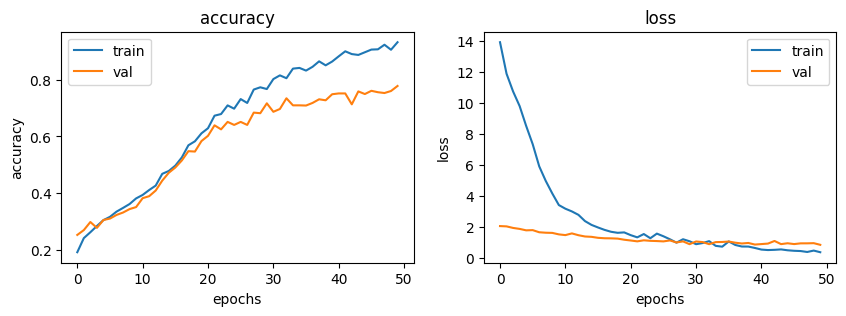

In [38]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 3))

for i, j in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[j])
    ax[i].plot(history.history['val_' + j])
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(j)
    ax[i].legend(['train', 'val'])

ax[0].set_title('accuracy')
ax[1].set_title('loss')

#Test model

In [39]:
# new_test_text=test_text.apply(lambda y: arabert_prep.preprocess(y))
test_input_ids,test_attention_mask=tokenization(test_text)
predictions = model_1.predict([test_input_ids, test_attention_mask])
predicted_labels = tf.argmax(predictions.logits, axis=1)

37/37 [==============================] - 7s 74ms/step


In [40]:
test_labels=test_data['Class']
#convert labels to tensors
test_labels = tf.constant(test_labels)

In [41]:
from sklearn.metrics import classification_report

y_true = test_labels # True labels of your test dataset
y_pred = predicted_labels # Predicted labels from your fine-tuned model


# Calculate the evaluation metrics
classification_report = classification_report(y_true, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       730
           1       0.70      0.74      0.72       346
           2       0.50      0.57      0.53        94

    accuracy                           0.80      1170
   macro avg       0.70      0.72      0.71      1170
weighted avg       0.81      0.80      0.80      1170



In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
# predictions = model_1.predict([test_input_ids, test_attention_mask])
# predicted_labels = tf.argmax(predictions.logits, axis=1)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8092923848606981
Recall: 0.8008547008547009
F1 Score: 0.8043746089026838


In [43]:
predicted_labels

<tf.Tensor: shape=(1170,), dtype=int64, numpy=array([0, 2, 2, ..., 1, 1, 0])>

In [44]:
test_labels

<tf.Tensor: shape=(1170,), dtype=int64, numpy=array([0, 2, 2, ..., 1, 1, 0])>